<a href="https://colab.research.google.com/github/arimbawa/Big-Data/blob/main/5_c_Social_Network_Analysis_of_Social_Media_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Network Analysis of Social Media Data
**Learning Objectives:**

1. Memahami konsep network dalam media sosial (node, edge, degree, centrality).
2. Menggunakan NetworkX untuk membangun graph.
3. Membuat visualisasi interaksi (mention, hashtag co-occurrence, retweet).
4. Analisis influencer (centrality, communities).

# Step 1. Install & Import Library

In [1]:
!pip install networkx matplotlib pandas

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 2. Dataset dari Modul Sebelumnya
Gunakan hasil tweets_smartcity.csv (atau buat dataset baru dari Tweepy).

In [2]:
df = pd.read_csv("tweets_smartcity.csv")
df.head()

,Date,UserID,Content,Likes,Retweets
0,2025-09-28 09:00:59+00:00,1780518229317910528,Dholera Smart City Project Gujarat - Dholera M...,0,0
1,2025-09-28 08:25:49+00:00,1619570587986190336,@Mbwesaa tatu city huwa tu smart ukiwa nje bt ...,0,0
2,2025-09-28 02:59:10+00:00,1684030039980118016,@save07republic @Satirical_Dhruv Ek kaam kar m...,0,0
3,2025-09-28 01:00:07+00:00,1972101681233133568,"Yana Mulyana, mantan Wali Kota Bandung, resmi ...",1,0
4,2025-09-28 00:59:23+00:00,1972101681233133568,Konoha Nagari - Smart City Kucipta (Lirik)\nht...,1,0


# Step 3. Extract Hashtags & Mentions

In [3]:
import re

def extract_hashtags(text):
    return re.findall(r"#(\w+)", str(text))

def extract_mentions(text):
    return re.findall(r"@(\w+)", str(text))

df["hashtags"] = df["Content"].apply(extract_hashtags)
df["mentions"] = df["Content"].apply(extract_mentions)
df.head()


,Date,UserID,Content,Likes,Retweets,hashtags,mentions
0,2025-09-28 09:00:59+00:00,1780518229317910528,Dholera Smart City Project Gujarat - Dholera M...,0,0,[],[]
1,2025-09-28 08:25:49+00:00,1619570587986190336,@Mbwesaa tatu city huwa tu smart ukiwa nje bt ...,0,0,[],[Mbwesaa]
2,2025-09-28 02:59:10+00:00,1684030039980118016,@save07republic @Satirical_Dhruv Ek kaam kar m...,0,0,[],"[save07republic, Satirical_Dhruv]"
3,2025-09-28 01:00:07+00:00,1972101681233133568,"Yana Mulyana, mantan Wali Kota Bandung, resmi ...",1,0,[],[]
4,2025-09-28 00:59:23+00:00,1972101681233133568,Konoha Nagari - Smart City Kucipta (Lirik)\nht...,1,0,[],[]


# Step 4. Build Hashtag Co-occurrence Network

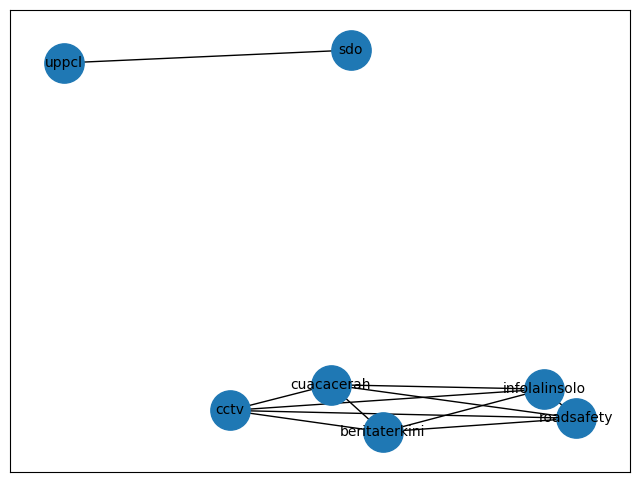

In [4]:
G = nx.Graph()

for tags in df["hashtags"]:
    if len(tags) > 1:
        for i in range(len(tags)):
            for j in range(i+1, len(tags)):
                G.add_edge(tags[i].lower(), tags[j].lower())

plt.figure(figsize=(8,6))
nx.draw_networkx(G, with_labels=True, node_size=800, font_size=10)
plt.show()

# Step 5. Mention Network (User → Mentioned User)

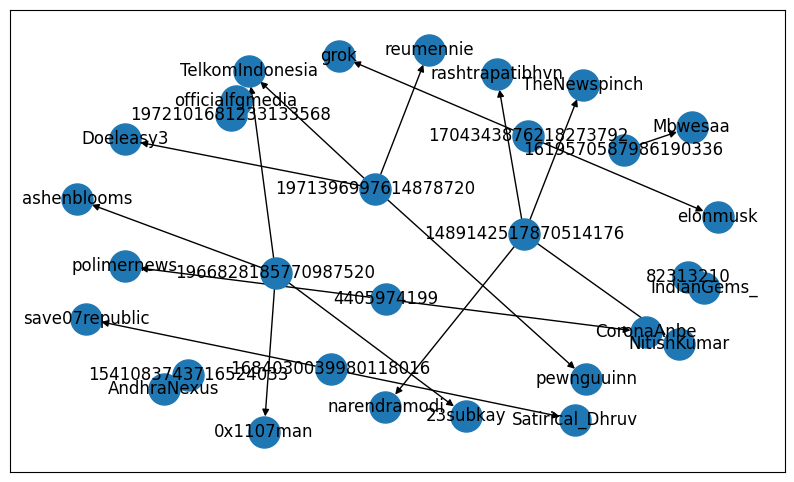

In [6]:
Gm = nx.DiGraph()

for _, row in df.iterrows():
    user = str(row["UserID"])
    for m in row["mentions"]:
        Gm.add_edge(user, m)

plt.figure(figsize=(10,6))
nx.draw_networkx(Gm, with_labels=True, node_size=500, arrows=True)
plt.show()

# Step 6. Network Metrics

In [7]:
# Degree Centrality
deg_cent = nx.degree_centrality(Gm)
sorted_deg = sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)
print("Top influencers (mention network):")
print(sorted_deg[:5])

# Betweenness Centrality
bet_cent = nx.betweenness_centrality(Gm)
sorted_bet = sorted(bet_cent.items(), key=lambda x: x[1], reverse=True)
print("Top bridge accounts:")
print(sorted_bet[:5])


Top influencers (mention network):
[('1966828185770987520', 0.13333333333333333), ('1971396997614878720', 0.13333333333333333), ('1489142517870514176', 0.13333333333333333), ('1684030039980118016', 0.06666666666666667), ('TelkomIndonesia', 0.06666666666666667)]
Top bridge accounts:
[('1619570587986190336', 0.0), ('Mbwesaa', 0.0), ('1684030039980118016', 0.0), ('save07republic', 0.0), ('Satirical_Dhruv', 0.0)]


# Classroom Activities

* Bangun hashtag network untuk topik pilihan mahasiswa.

* Analisis siapa akun paling berpengaruh di mention/retweet network.

* Diskusikan bedanya degree centrality vs betweenness centrality.

* Eksplorasi komunitas dengan algoritma modularity.

# Assessment

1. Tugas individu: buat hashtag co-occurrence network dari 200 tweet, analisis top 5 hashtag paling sentral.

2. Tugas kelompok: bangun mention network dan identifikasi 3 akun paling berpengaruh. Diskusikan apakah akun ini influencer, media, atau user biasa.

Dengan Modul ini, mahasiswa sudah menguasai pipeline lengkap:

* Ambil data sosial media.

* Analisis teks dengan NLP.

* Bangun jejaring sosial (hashtags, mentions, retweets).